<a href="https://colab.research.google.com/github/TGalliz/FinancePortfolio/blob/main/MLforInvest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This Program uses an artificial recurrent Neural Netoword called LSTM. to predict
# the closing stock price of a corporation (DSG.TO) using the past 60 days stock price.

#Import Libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('DSG.TO', data_source='yahoo',start='2012-01-01', end='2020-12-31')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,7.380000,7.290000,7.370000,7.350000,4000,7.350000
2012-01-04,7.350000,7.220000,7.350000,7.320000,13100,7.320000
2012-01-05,7.390000,7.300000,7.350000,7.310000,7500,7.310000
2012-01-06,7.330000,7.150000,7.310000,7.200000,7600,7.200000
2012-01-09,7.200000,7.150000,7.160000,7.150000,24900,7.150000
...,...,...,...,...,...,...
2020-12-23,78.430000,75.639999,78.430000,75.669998,104600,75.669998
2020-12-24,76.760002,75.660004,75.720001,76.379997,59100,76.379997
2020-12-29,76.500000,75.099998,75.610001,76.160004,165100,76.160004


In [ ]:
#Get the number of rows in the date set
df.shape

(2259, 6)

Text(0, 0.5, 'Close Price CAD $')

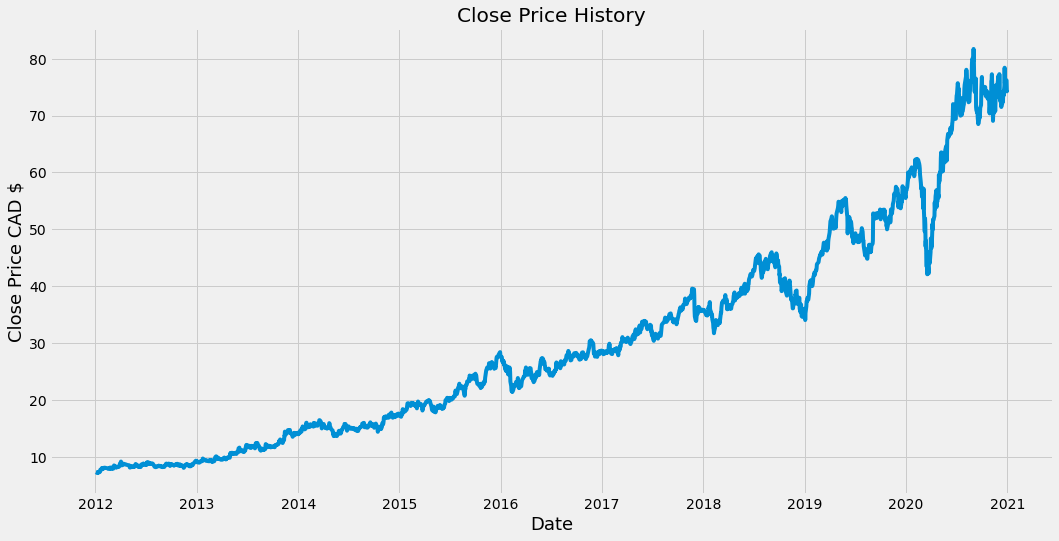

In [ ]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price CAD $',fontsize =18)

In [ ]:
#Create new dataframe with only 'Close column'
data = df.filter(['Close'])
#Convert dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len


1808

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00268276],
       [0.00228035],
       [0.00214621],
       ...,
       [0.92568755],
       [0.90006711],
       [0.90274983]])

In [ ]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train datasets
#Windowing data on 60 days
#takes the past 60 days to previous the 60th day
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00268276, 0.00228035, 0.00214621, 0.00067069, 0.        ,
       0.00241448, 0.00201207, 0.00201207, 0.00201207, 0.00201207,
       0.00402414, 0.0073776 , 0.00804829, 0.00617036, 0.01006036,
       0.01180415, 0.00979209, 0.01073105, 0.00952381, 0.01073105,
       0.0119383 , 0.01260899, 0.01274313, 0.01274313, 0.01220658,
       0.01234071, 0.01207244, 0.01167003, 0.01167003, 0.01153588,
       0.01153588, 0.01140174, 0.0101945 , 0.0101945 , 0.00952381,
       0.01086519, 0.01314554, 0.01207244, 0.01140174, 0.0101945 ,
       0.01274313, 0.01341381, 0.0112676 , 0.01032864, 0.0119383 ,
       0.01381623, 0.01810865, 0.01542589, 0.0147552 , 0.01488934,
       0.01448691, 0.01542589, 0.01274313, 0.0147552 , 0.01462106,
       0.01462106, 0.0147552 , 0.0140845 , 0.01488934, 0.01609658])]
[0.018913486033164006]

[array([0.00268276, 0.00228035, 0.00214621, 0.00067069, 0.        ,
       0.00241448, 0.00201207, 0.00201207, 0.00201207, 0.00201207,
       0.00402414, 0.0073776 , 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data to give the data a 3D appearance
#a LSTM expects the input number of samples, number of timesteps number of features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1748, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1748/1748 [==============================] - 41s 22ms/step - loss: 9.0077e-04


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1808 to 2259
test_data = scaled_data[training_data_len-60: ,:]
#Create teh data set x_test and y_test
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.2840982809947312

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


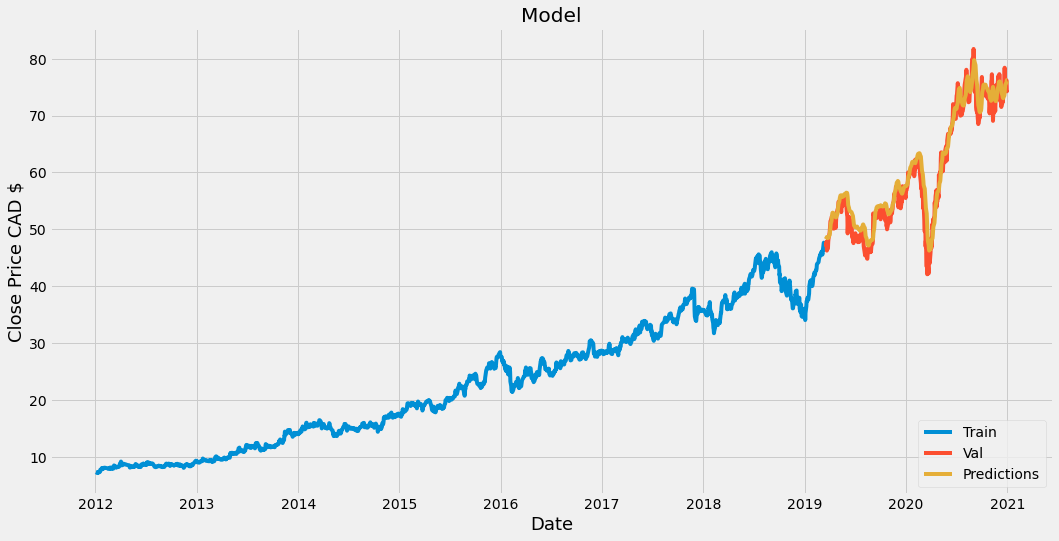

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price CAD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Get the quote
